<a href="https://colab.research.google.com/github/souzavitorchaves/data-modelling-dnc/blob/main/data-modelling-dnc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 05: Prepare seu dataset para modelagem de dados
*link do Desafio: https://dncgroupbr.notion.site/Desafio-Prepare-seu-dataset-para-modelagem-de-dados-6eba93d9b756469eab2a286880d3f897*

**Tarefas a serem executadas**


1.   Leia o arquivo e inspecione os dados ✅

2.   Verifique se há valores faltantes na identificação do cliente ✅
    
3.   Verifique se há produtos com preços unitários iguais ou inferior a 0 ✅

4.   Verifique se existem linhas duplicadas ✅
    
5.   Tipos de dados da coluna ✅

6.   Tratando os outliers ✅

7.   Crie uma coluna adicional ✅

8.   Última data ✅

9.   Plotando gráficos ✅

10.  Cálculo do RFM ✅





##Importando bibliotecas e dados##

In [ ]:
#installing the most recently version od pandas profiling
!pip install ydata-profiling

In [ ]:
#used for data manipulation and metrics
import numpy as np
import pandas as pd
import calendar
from ydata_profiling import ProfileReport
from datetime import datetime

#graphic visualization of the data
import seaborn as sns
import matplotlib.pyplot as plt

#
from sklearn import metrics
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
url = 'https://drive.google.com/file/d/10M9-BH2PRE17_vLHVnks-H7ochgfO1b-/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='unicode_escape')

## 1 - Leia o arquivo e inspecione os dados ##

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#ProfileReport(df)

## 2 - Valores faltantes na identificação do cliente ##

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df = df.dropna()
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## 3 - Preços unitários e quantidade de produtos iguais ou inferior a 0 ##

In [ ]:
df[df['UnitPrice'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df = df[df['UnitPrice']>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df[df['Quantity'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df = df[df['Quantity']>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## 4 - Verifique se existem linhas duplicadas ##

In [ ]:
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


## 5 - Tipos de dados da coluna ##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)

<ipython-input-19-b57c4042606f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  int64  
 7   Country      392692 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.0+ MB


In [ ]:
df[df['InvoiceDate'].str.contains('12/13/2010')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26732,538521,21754,HOME BUILDING BLOCK WORD,3,12/13/2010 9:02,5.95,14180,United Kingdom
26733,538521,21755,LOVE BUILDING BLOCK WORD,3,12/13/2010 9:02,5.95,14180,United Kingdom
26734,538521,22072,RED RETROSPOT TEA CUP AND SAUCER,8,12/13/2010 9:02,3.75,14180,United Kingdom
26735,538521,22846,BREAD BIN DINER STYLE RED,1,12/13/2010 9:02,16.95,14180,United Kingdom
26736,538521,22849,BREAD BIN DINER STYLE MINT,1,12/13/2010 9:02,16.95,14180,United Kingdom
...,...,...,...,...,...,...,...,...
29010,538683,21326,AGED GLASS SILVER T-LIGHT HOLDER,12,12/13/2010 17:40,0.65,14525,United Kingdom
29011,538683,21385,IVORY HANGING DECORATION HEART,24,12/13/2010 17:40,0.85,14525,United Kingdom
29012,538683,85123A,WHITE HANGING HEART T-LIGHT HOLDER,96,12/13/2010 17:40,2.55,14525,United Kingdom
29013,538683,22155,STAR DECORATION RUSTIC,48,12/13/2010 17:40,0.42,14525,United Kingdom


In [ ]:
dateFormat = '%m/%d/%Y %H:%S'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format=dateFormat)
df.info()

<ipython-input-22-70c5df9e71b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format=dateFormat)


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


## 6 - Tratando os Outliers ##

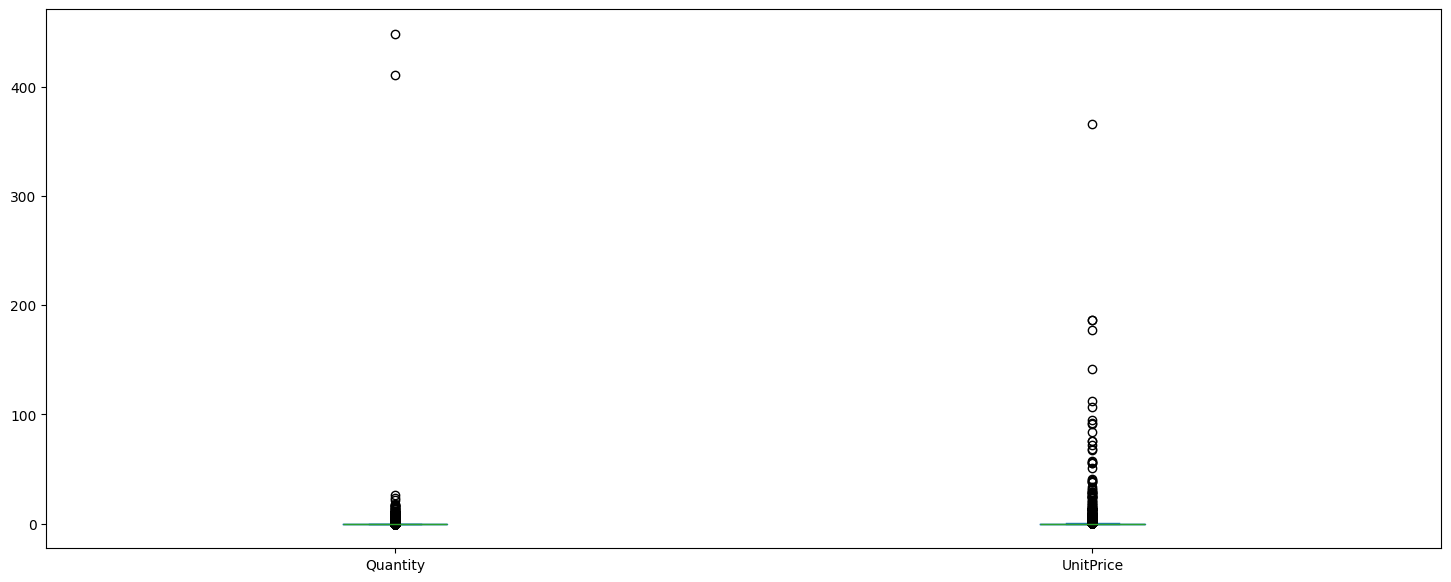

In [ ]:
numeric_cols = df.select_dtypes('number').columns.difference(['CustomerID'])

df[numeric_cols].apply(scale).plot.box(figsize=(18,7));

In [ ]:
df = df[(df['Quantity']<=10000) & (df['UnitPrice']<=5000)]

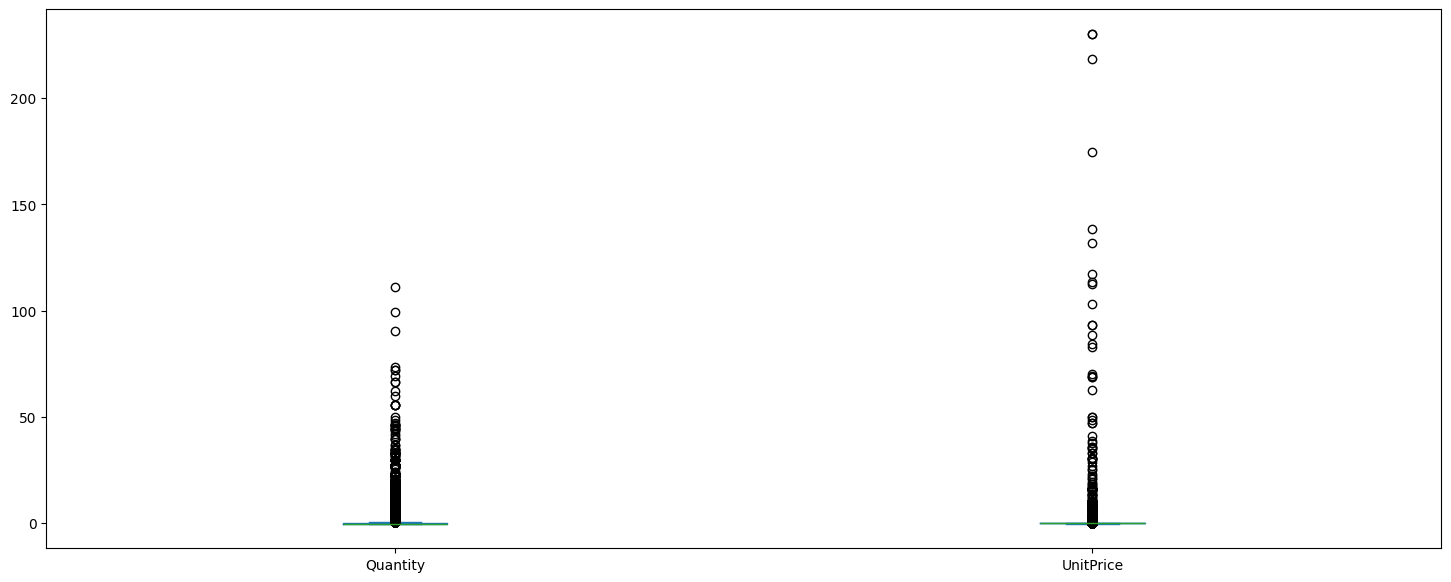

In [ ]:
df[numeric_cols].apply(scale).plot.box(figsize=(18,7));

## 7  - Crie uma coluna adicional ##

In [ ]:
df['Total'] = df['UnitPrice'] * df['Quantity']

<ipython-input-26-19bfc3c777dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['UnitPrice'] * df['Quantity']


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:00:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:00:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:00:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:00:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:00:26,3.39,17850,United Kingdom,20.34


## 8 - Última data ##

In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:00:50')

In [ ]:
df.loc[df['InvoiceDate'].idxmax()]

,541894
InvoiceNo,581587
StockCode,22631
Description,CIRCUS PARADE LUNCH BOX
Quantity,12
InvoiceDate,2011-12-09 12:00:50
UnitPrice,1.95
CustomerID,12680
Country,France
Total,23.4


## 9 - Plotando gráficos ##



1.   Top 10 países com maior valor em vendas
2.   Top 10 produtos mais vendidos
3.   Valor de venda total por mês
4.   Valor de venda total por país
5.   Valor de venda total por mês e por país





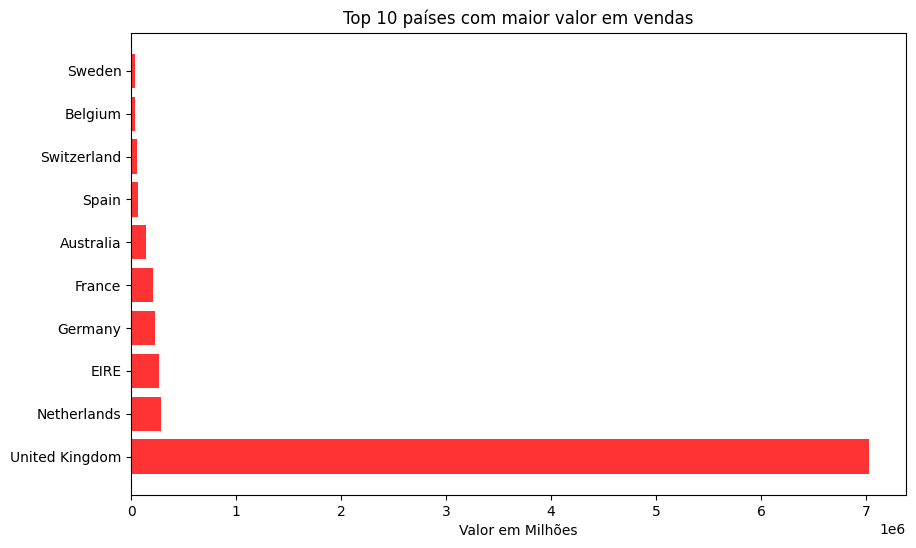

In [ ]:
top10countries = round(df.groupby('Country')['Total'].agg('sum').sort_values(ascending = False).reset_index()[0:10],2)
top10countries
plt.figure(figsize=(10,6))
plt.xlabel('Valor em Milhões')
plt.title('Top 10 países com maior valor em vendas')
plt.barh(top10countries['Country'], top10countries['Total'], color='#FF3333');
plt.show();

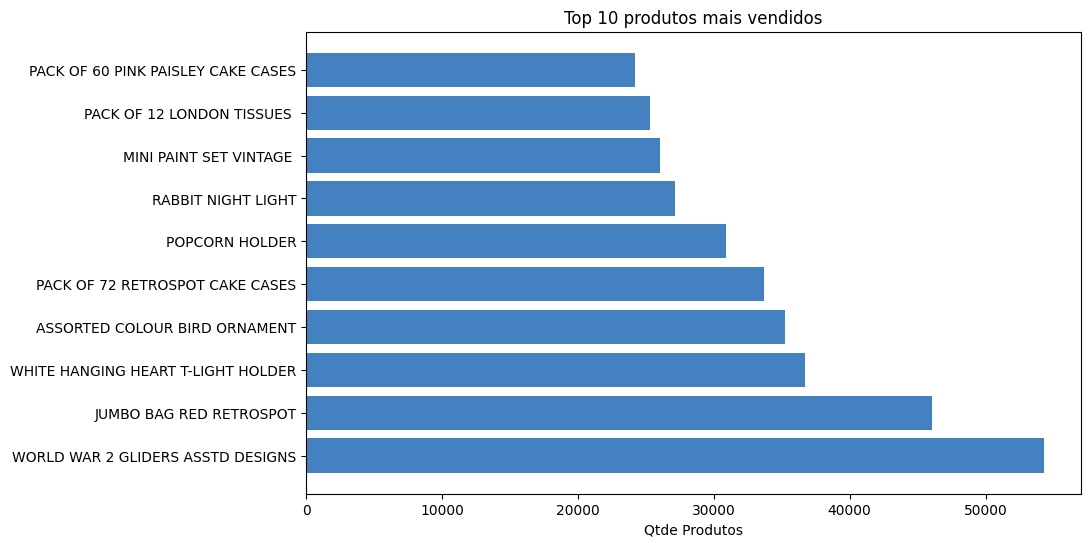

In [ ]:
top10products = round(df.groupby('Description')['Quantity'].agg('sum').sort_values(ascending = False).reset_index()[0:10],2)
top10products
plt.figure(figsize=(10,6))
plt.xlabel('Qtde Produtos')
plt.title('Top 10 produtos mais vendidos')
plt.barh(top10products['Description'], top10products['Quantity'], color='#4381C1');
plt.show();

<ipython-input-32-64f367ac333d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month.apply(lambda x: calendar.month_name[x])


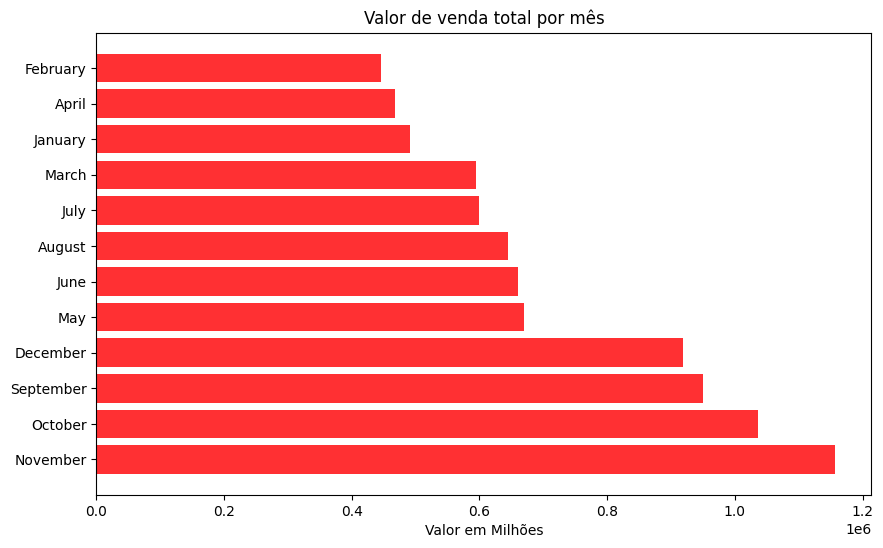

In [ ]:
df['Month'] = df['InvoiceDate'].dt.month.apply(lambda x: calendar.month_name[x])
#df['Month'] = df['Month'].dt.strftime('%B')
totalPerMonth = round(df.groupby('Month')['Total'].agg('sum')
                    .reset_index().sort_values(by='Total',ascending=False),2)

plt.figure(figsize=(10,6))
plt.xlabel('Valor em Milhões')
plt.title('Valor de venda total por mês')
plt.barh(totalPerMonth['Month'], totalPerMonth['Total'], color='#FF3033');
plt.show();

<Axes: xlabel='Country,Month'>

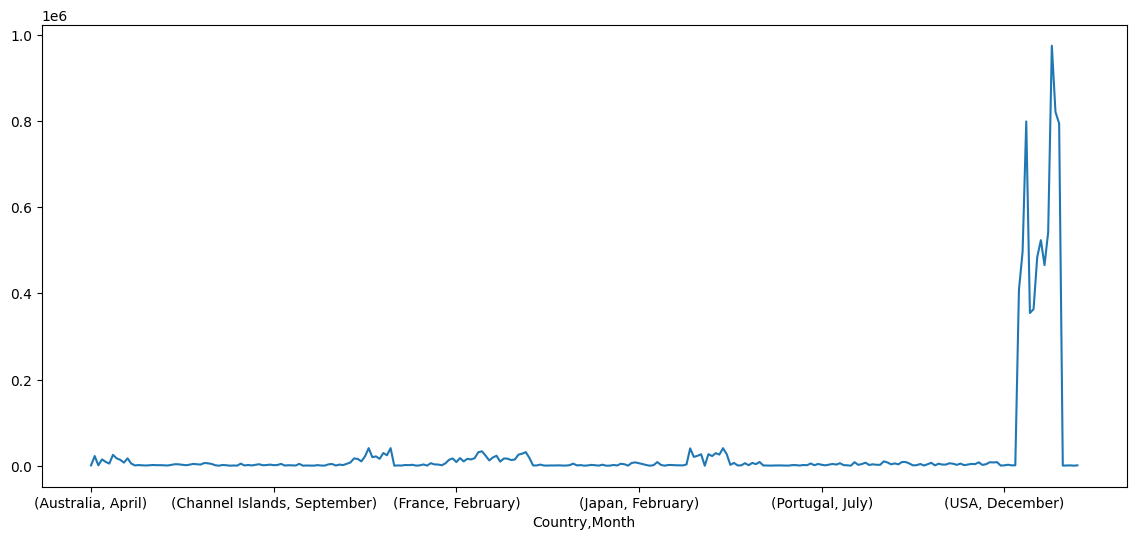

In [ ]:
plot1 = df[['Month', 'Country', 'Total']]
plot1 = plot1.groupby(['Country','Month'])['Total'].agg('sum')
#plot1.plot(plot1['Month'], plot1['Total'])
plt.figure(figsize=(14,6))
plot1.plot()

## 10 - Cálculo do RFM ##

Agrupe os dados por cliente e pedido/compra (InvoiceNo) e obtenha a data e o preço total do pedido.
Com isso, agrupe novamente apenas por cliente e calcule o RFM, onde:

- R é a recência, diferença em dias da última compra do cliente e da última compra disponível no conjunto de dados, que calcularam previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo cliente = quantas vezes esse cliente se repete
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente = sum(total) / count(customerID)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392689 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  object        
 8   Total        392689 non-null  float64       
 9   Month        392689 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 41.0+ MB


In [ ]:
#recency
last_date = df['InvoiceDate'].max()
df_rfm = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_rfm['Recency']= (df_rfm['InvoiceDate'] - last_date).dt.days
df_rfm

,CustomerID,InvoiceDate,Recency
0,12347,2011-12-07 15:00:52,-2
1,12348,2011-09-25 13:00:13,-75
2,12349,2011-11-21 09:00:51,-19
3,12350,2011-02-02 16:00:01,-310
4,12352,2011-11-03 14:00:37,-36
...,...,...,...
4332,18280,2011-03-07 09:00:52,-278
4333,18281,2011-06-12 10:00:53,-181
4334,18282,2011-12-02 11:00:43,-8
4335,18283,2011-12-06 12:00:02,-4


In [ ]:
#frequency
df_rfm['Frequency'] = df['CustomerID'].map(df['CustomerID'].value_counts())
df_rfm

,CustomerID,InvoiceDate,Recency,Frequency
0,12347,2011-12-07 15:00:52,-2,297.0
1,12348,2011-09-25 13:00:13,-75,297.0
2,12349,2011-11-21 09:00:51,-19,297.0
3,12350,2011-02-02 16:00:01,-310,297.0
4,12352,2011-11-03 14:00:37,-36,297.0
...,...,...,...,...
4332,18280,2011-03-07 09:00:52,-278,218.0
4333,18281,2011-06-12 10:00:53,-181,218.0
4334,18282,2011-12-02 11:00:43,-8,218.0
4335,18283,2011-12-06 12:00:02,-4,127.0


In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   4337 non-null   int64         
 1   InvoiceDate  4337 non-null   datetime64[ns]
 2   Recency      4337 non-null   int64         
 3   Frequency    3054 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 135.7 KB


In [ ]:
#m - average
SumCustomer = df.groupby('CustomerID')['Total'].sum() #ok
CountCustomer = df.groupby('CustomerID')['Total'].count() #ok
#new df with average
average_df = pd.DataFrame({
                           'Average': SumCustomer / CountCustomer}).reset_index()
#merge df to unify "CustomerID"
df_rfm = pd.merge(df_rfm, average_df, on='CustomerID', how='left')
df_rfm.head()

,CustomerID,InvoiceDate,Recency,Frequency,Average
0,12347,2011-12-07 15:00:52,-2,297.0,23.681319
1,12348,2011-09-25 13:00:13,-75,297.0,57.975484
2,12349,2011-11-21 09:00:51,-19,297.0,24.076027
3,12350,2011-02-02 16:00:01,-310,297.0,19.670588
4,12352,2011-11-03 14:00:37,-36,297.0,29.482824
